In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

In [20]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=5)

In [21]:
X.shape

(500, 2)

In [22]:
y = y.reshape(-1, 1)

In [23]:
y.shape

(500, 1)

In [24]:
X[:5]

array([[ 1.22167239, -0.4757541 ],
       [-0.2292072 , -1.85663378],
       [-1.34913896,  0.50458721],
       [ 0.31402206, -1.62029248],
       [ 1.13807877, -0.99148158]])

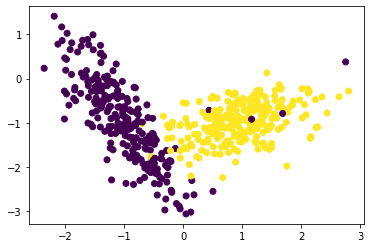

In [25]:
plt.scatter(x = X[:, 0], y = X[:, 1], c = y)
plt.show()

In [26]:
y[:5]

array([[1],
       [0],
       [0],
       [1],
       [1]])

## From sklearn 

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X, y)

/Users/mohit/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [30]:
model.score(X, y)

0.964

# Scratch Implementation


In [33]:
ones = np.ones((500,1))
Xnew = np.hstack((ones, X))

In [34]:
Xnew.shape

(500, 3)

In [36]:
Xnew[:5]

array([[ 1.        ,  1.22167239, -0.4757541 ],
       [ 1.        , -0.2292072 , -1.85663378],
       [ 1.        , -1.34913896,  0.50458721],
       [ 1.        ,  0.31402206, -1.62029248],
       [ 1.        ,  1.13807877, -0.99148158]])

In [44]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

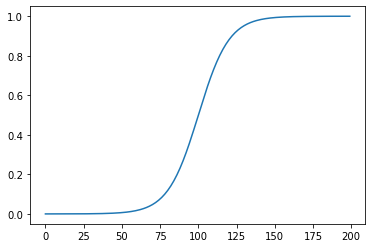

In [50]:
s = sigmoid(np.arange(-10, 10, 0.1))
plt.plot(s)

### Logistic Regression

In [51]:
def hypothesis(X,theta):
    '''
    X : np.array. shape - (m,n)
    theta : np.array. shape - (n,1)
    
    return : np.array (m,1)
    '''

    return sigmoid(X.dot(theta)) # X.theta

In [52]:
def error(X,Y,theta):
    '''
    X : np.array. shape - (m,n)
    Y : np.array. shape - (m,1)
    theta : np.array. shape - (n,1)
    
    return : Scalar loss value
    '''
    
    Y_ = hypothesis(X,theta)
    e = np.mean(Y*np.log(Y_) + (1-Y)*np.log(1-Y_))
    
    return -e

In [53]:
def gradient(X,Y,theta):
    '''
    X : np.array. shape - (m,n)
    Y : np.array. shape - (m,1)
    theta : np.array. shape - (n,1)
    
    return : np.array (n,1)
    '''
    
    Y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(Y_ - Y))
    
    return grad/X.shape[0]

In [57]:

def gradient_descent(X, Y, learning_rate = 0.1, max_iters=100):
    
    n = X.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,Y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,Y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [64]:
theta, errors = gradient_descent(Xnew, y, learning_rate=0.5, max_iters=500)

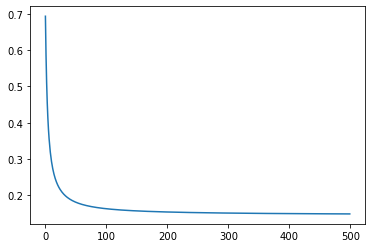

In [65]:
plt.plot(errors)

In [66]:
theta

array([[1.48475445],
       [4.27326766],
       [0.90925834]])

### Plot decision boundary

In [68]:
x1 = np.array([-2,3])

In [74]:
x1

array([-2,  3])

In [71]:
x2 = -(theta[0] + theta[1]*x1)/ theta[2]

In [72]:
x2

array([  7.76652858, -15.73211576])

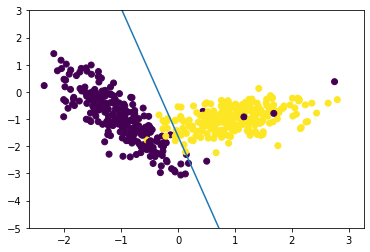

In [77]:
plt.plot(x1,x2)
plt.ylim(top=3, bottom=-5)
plt.scatter(x = X[:, 0], y = X[:, 1], c = y)
plt.show()

## Prediction?

In [81]:
new_point = np.array([[1, -1, -2]])
new_point

array([[ 1, -1, -2]])

In [87]:
np.round(hypothesis(new_point, theta))

array([[0.]])

In [83]:
new_point2 = np.array([[1, 2, -2]])
new_point2

array([[ 1,  2, -2]])

In [88]:
np.round(hypothesis(new_point2, theta))

array([[1.]])

In [93]:
y_pred = np.round(hypothesis(Xnew, theta)).astype('int')

In [94]:
y[:5]

array([[1],
       [0],
       [0],
       [1],
       [1]])

In [96]:
y_pred[:5]

array([[1],
       [0],
       [0],
       [1],
       [1]])

### Accuracy ?

In [101]:
def accuracy(actual, prediction):
    return (actual  == prediction ).sum()/actual.shape[0]

In [102]:
accuracy(y_pred, y)

0.964